# Fourier Transforms Exercises

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib

%matplotlib inline
matplotlib.rcParams.update({'font.size': 16,'figure.figsize':(10,6)})

## Discrete Fourier Transform (DFT)

#### $S[m] = \sum_{n=0}^{N-1} s[n] e^{-i 2 \pi m \left({\frac{n}{N}}\right) }$

Write a function that computes the DFT of a 1D-array.

In [ ]:
def DFT_slow(s):
    """
    Compute the discrete Fourier Transform of the 1D array x
    :param s: (array)
    """

    N = s.shape[0]
    S = np.zeros(N)
    for m in range(N):
        S[m] = np.sum(s*np.exp(-1j * 2 * np.pi * m * (np.arange(N)/N)))
    return S

If you have extra time, try writing a function that also computes the DFT but by using the **dot product** (recall the dot product is the sum of element-wise products).

In [ ]:
def DFT(s):
    """
    Compute the discrete Fourier Transform of the 1D array x
    :param s: (array)
    """

    return np.exp(np.arange(len(s)) / len(s) * -1j * 2 * np.pi) ** np.arange(N)

Below is an example signal constructed to test out both of your DFT functions.

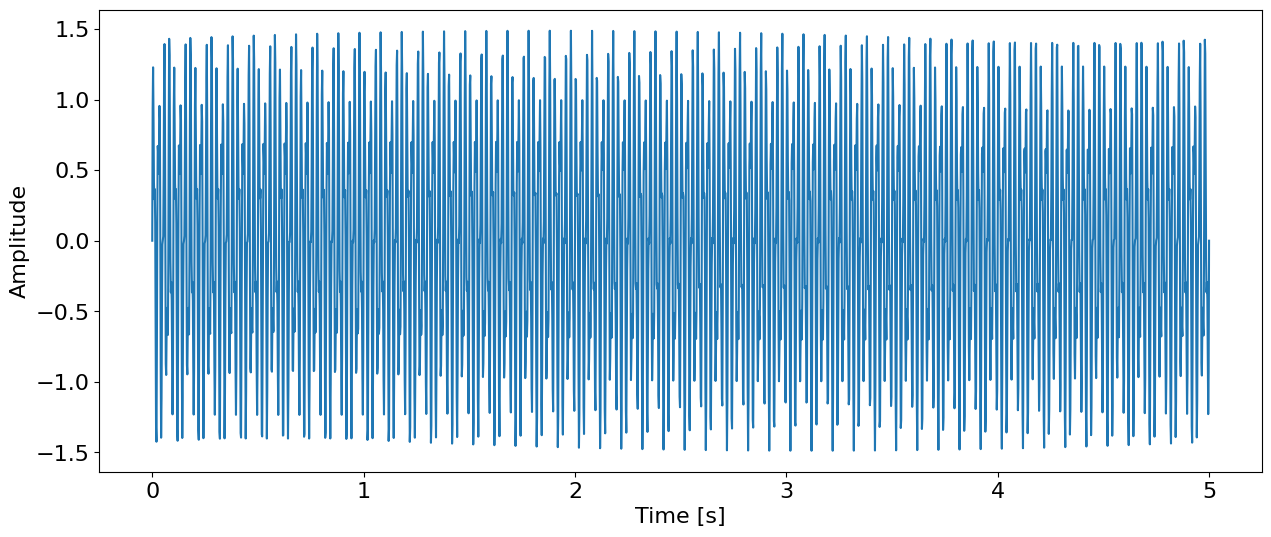

In [ ]:
num_sec = 5         # sampling period (in seconds)
num_pts = 500       # samples per second

# Make a complex signal with two sinusoids to test both of your DFT calculation methods
t = np.linspace(0, num_sec, num_pts*num_sec)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

plt.figure(figsize=(15,6))
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

In [ ]:
Fs = 1/(t[1] - t[0])     # sample rate
N = s.size               # number of samples (length of signal)

k = np.arange(N)         # frequncy bins
T = N/Fs                 # frequency interval of a single bin
frq = k/T                # two sides frequency range
frq = frq[range(N//2)]   # one side frequency range (Fourier transform outputs symmetric frequencies)

### Test it out!
Perform a Fourier transform on the example signal defined above using your DFT function(s) AND numpy's `fft`.

As a bonus, time how long it takes for each method to run and compare them! (You can use the time module, i.e. `import time`.)

In [ ]:
# Perform Fourier transform using your DFT function(s) and numpy's fft

## YOUR CODE HERE
import time

t0 = time.time()
fast = np.fft.fft(s)

t1 = time.time()
slow = DFT_slow(s)

t2 = time.time()
print(f"Our DFT: {t2-t1} seconds, np.fft: {t1-t0} seconds")

/tmp/ipykernel_40/3187573915.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  S[m] = np.sum(s*np.exp(-1j * 2 * np.pi * m * (np.arange(N)/N)))
Our DFT: 0.21843242645263672 seconds, np.fft: 0.000598907470703125 seconds


## Frequency Spectrum

Plot the **frequency spectrum** using your DFT function(s) and numpy's `fft`. They should all come out the same.

Note that when we plot a DFT we take the absolute value of what the FFT returns. (The raw value returned by the FFT has both real and imaginary components. When we take its absolute value, we are calculating the magnitude of the sine waves that make up the original signal and ignoring their phases.)

Also, we often only plot the **first half** of the FFT. This is because when we take the FFT of a completely real signal, the second half of the FFT is just the **complex conjugate** of the first half, and thus **redundant**.

In [ ]:
def plot_FT(ft, T, N, flipxy=False):
    """
    Plot the Fourier transform frequency spectrum
    :param ft: output of Fourier transform (i.e., np.fft.fft())
    :param T: sample resolution (in seconds)
    :param N: total number of samples

    Note: only plot the first 1/2 of what the FT returns 
    (the other half is just the complex congugate)

    """

    f = np.linspace(0.0, 1.0/(2.0*T), N//2)

    plt.plot(f, 2.0/N * np.abs(ft[0:N//2]))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')

    if not flipxy:
        plt.show()
    else:
        plt.gca().invert_xaxis()
    # Sometimes we may want to plot on flipped x-y axis
        ## YOUR CODE HERE

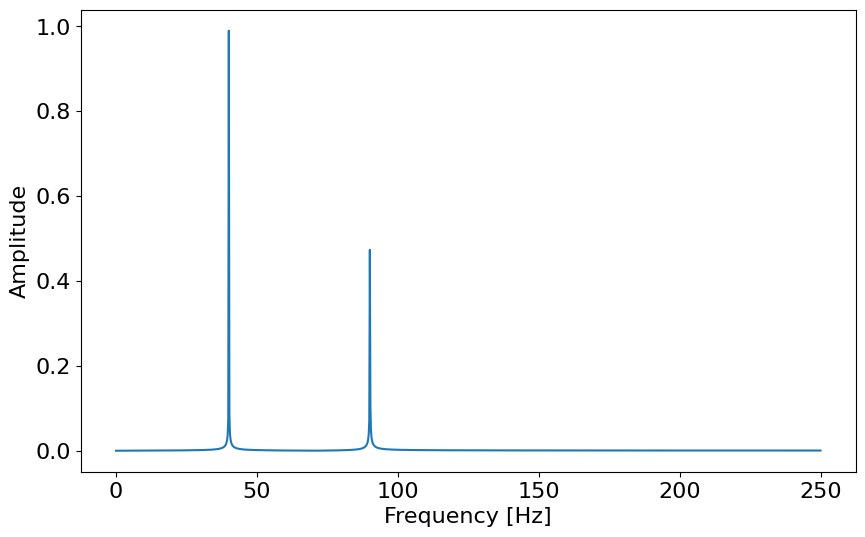

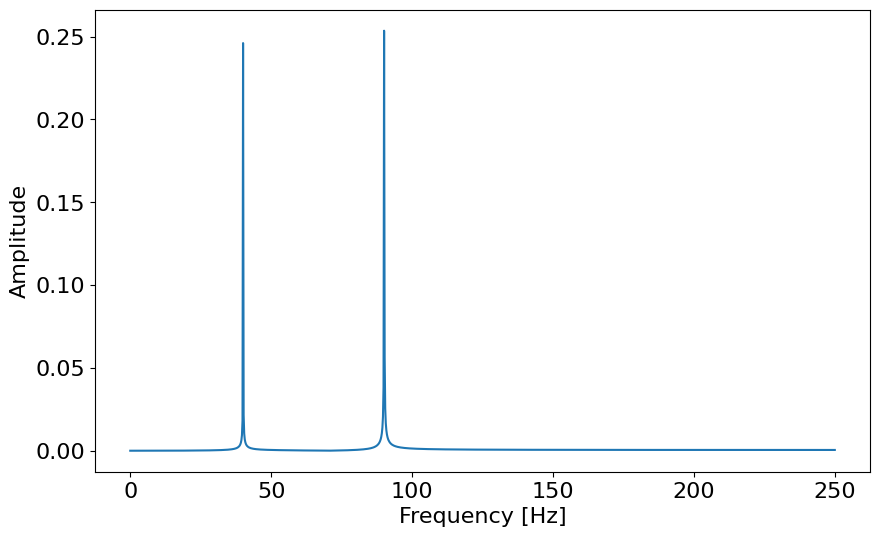

In [ ]:
# Plot using the above function you just defined and np.fft.fft to ensure they provide the same answer

T = t[1] - t[0]  # sample rate
N = len(s)

plot_FT(fast, T, N)
plot_FT(slow, T, N)

## Inverse Fourier Transform (IFT)

Let's try a more complicated signal.

Try taking the FFT of the ECG signal (you can use `np.fft.fft`) and plot it next to the time-domain signal. Can you identify any peaks in the FFT corresponding to repeating structures in the ECG? (You might need to zoom into the x-axis.)

Also, use the IFFT function (`np.fft.ifft`) to reproduce the time-domain signal again from the FFT and verify it matches the original.

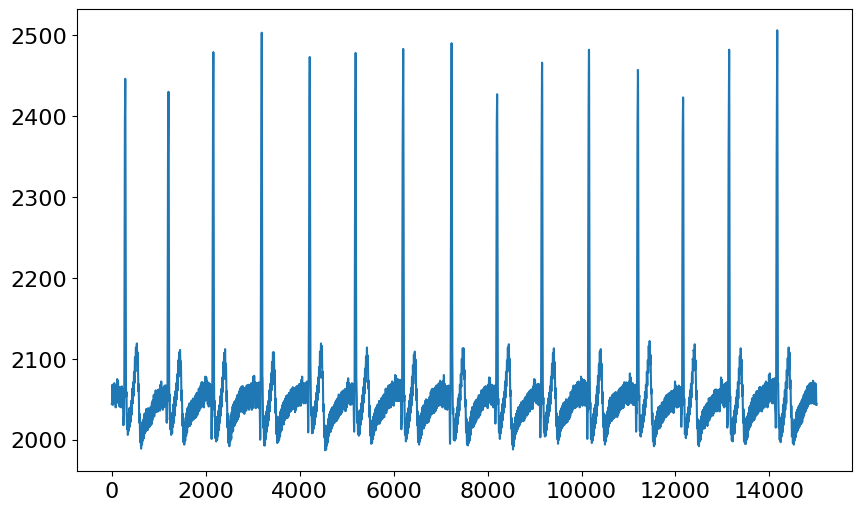

/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


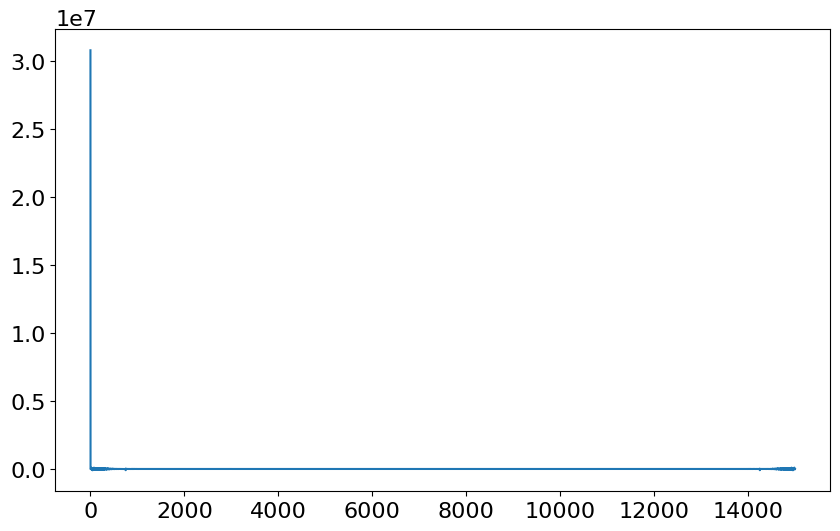

(0.0, 14000.0)

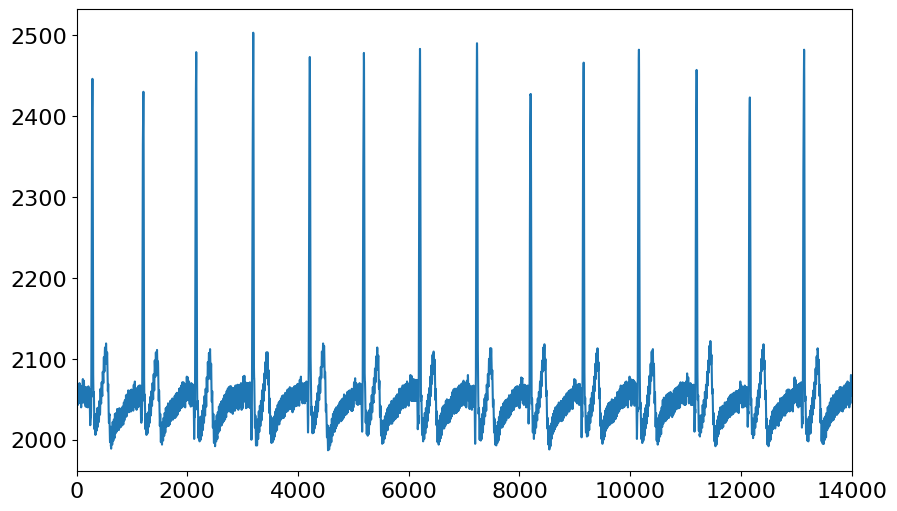

In [ ]:
y_ecg = np.loadtxt('https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/ecg.txt', skiprows=4)

# FFT and IFFT
## YOUR CODE HERE
fft_ecg = np.fft.fft(y_ecg)

# PLOT
## YOUR CODE HERE
plt.plot(y_ecg)
plt.show()

plt.plot(fft_ecg)
plt.show()

y_ecg_recon = np.fft.ifft(fft_ecg, n=len(y_ecg))
plt.plot(abs(y_ecg_recon))

plt.xlim([0, 14000])

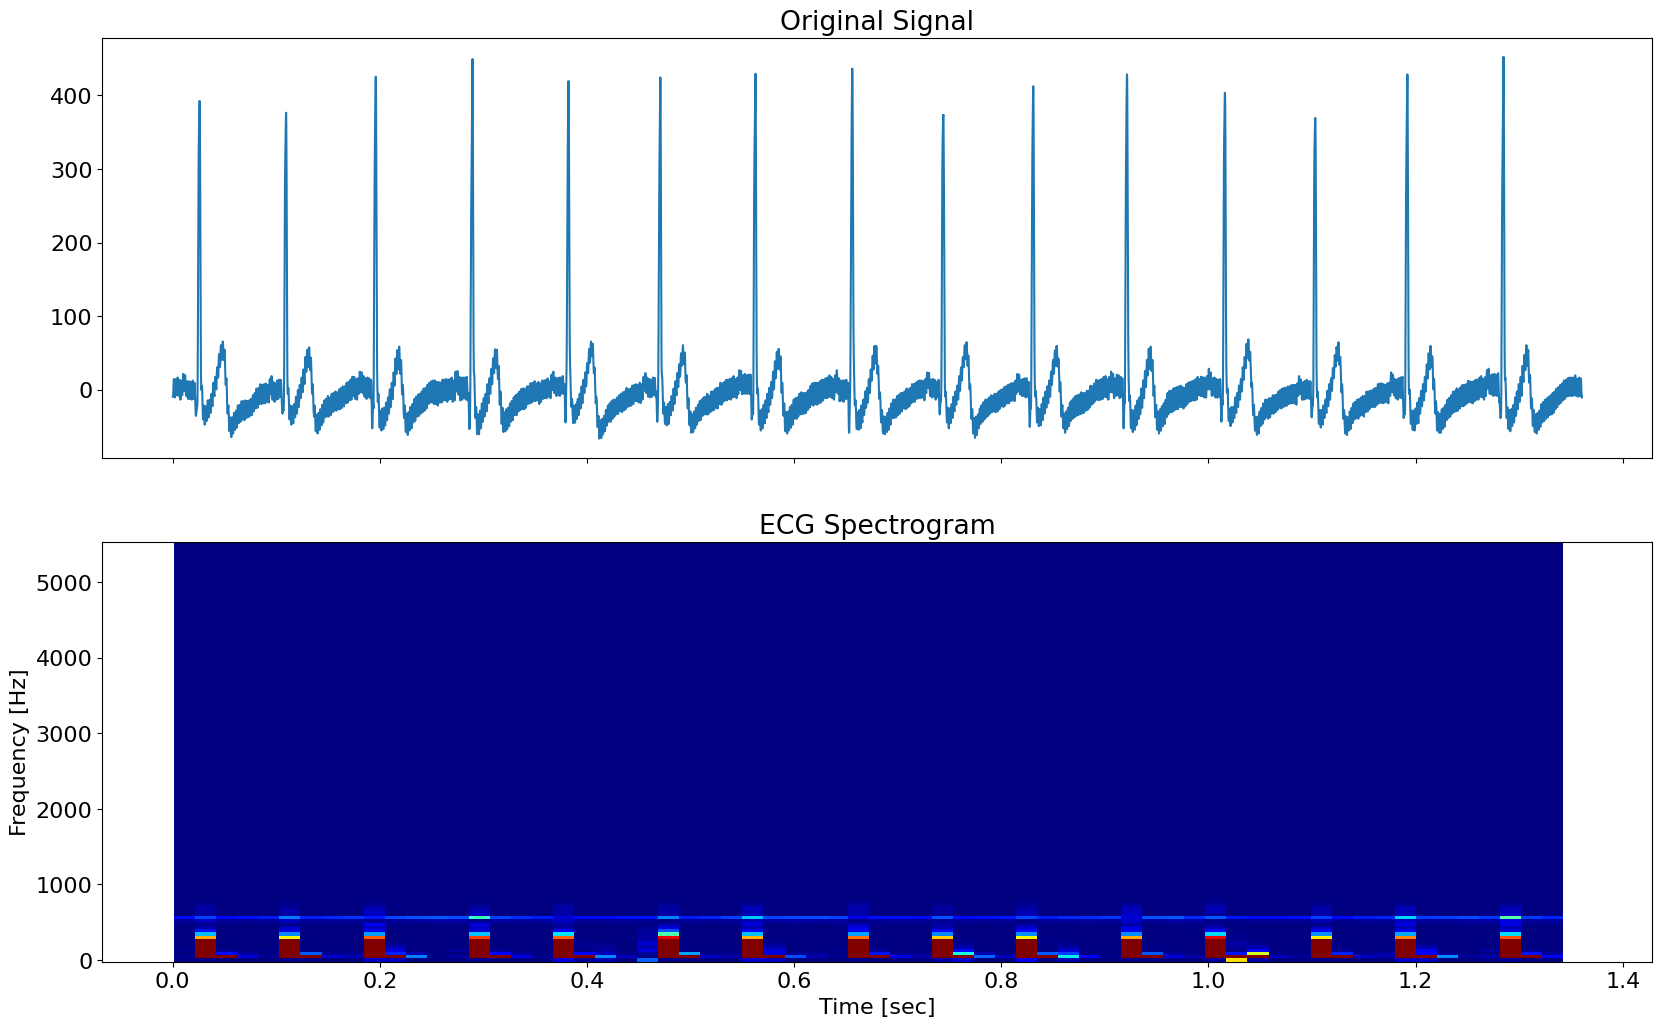

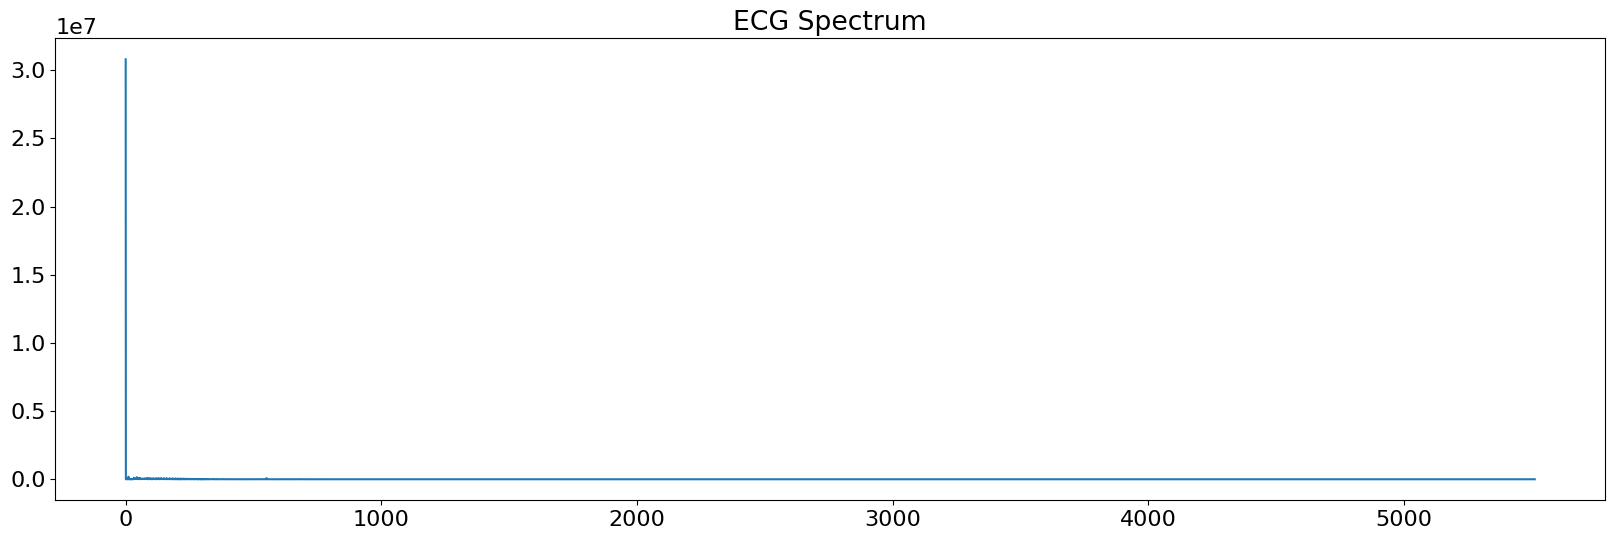

In [ ]:
from scipy import signal

T = t[1]-t[0]
N = t.size

# (sample_rate, y) = scipy.io.wavfile.read(y_ecg)
y = y_ecg
y = y- np.mean(y)
sample_freq, segment_time, spec_data = signal.spectrogram(y, 44100 / 4)
t = np.arange(0, len(y)/sample_rate, 1/sample_rate)
N = y.size  
T = t[1]-t[0]

fft=np.fft.fft(y)

f, (ax1, ax2) = plt.subplots(2, 1, sharex='col', sharey='row',figsize=(20,12))

ax1.plot(t,y)
ax1.set_title('Original Signal')

ax2.pcolormesh(segment_time, sample_freq, spec_data,cmap='jet',vmax=10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("ECG Spectrogram")

plt.figure(figsize = (20,6))
plt.title("ECG Spectrum")
T_samp = t[-1]-t[0] #get length of full sampling interval in time domain
freq_vals = np.arange(0, (len(t)-1)/2, 1) / T_samp #get frequency bin values up to Nyquist frequency
amp_vals = np.abs(fft_ecg[:len(freq_vals)]) #get amplitude values for all these frequency bins
plt.plot(freq_vals, amp_vals)
# plt.ylabel('|DFT[s(t)]|')

Okay, well that looks pretty good, but how well were we able to reconstruct the signal really? Check the correlation coefficient.

In [ ]:
np.corrcoef(abs(y_ecg), abs(y_ecg_recon))

array([[1., 1.],
       [1., 1.]])

## Okay, but that was a relatively periodic signal...
Let's try with a signal that doesn't look periodic at all!

(I.e. compare the raw signal to its FFT, and reconstruct the raw signal by performing an inverse Fourier transform.)

In [ ]:
import scipy.io.wavfile
from IPython.display import Audio

# Original signal
!wget https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/Sounds/newt.wav
(sample_rate, y_newt) = scipy.io.wavfile.read("./newt.wav")
t = np.arange(0, len(y_newt)/sample_rate, 1/sample_rate)

print('Sample rate: {} Hz'.format(sample_rate))

--2024-07-16 15:39:03--  https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/Sounds/newt.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99852 (98K) [audio/wav]
Saving to: ‘newt.wav’

newt.wav            100%[===================>]  97.51K  --.-KB/s    in 0.002s  

2024-07-16 15:39:03 (40.4 MB/s) - ‘newt.wav’ saved [99852/99852]

Sample rate: 11025 Hz


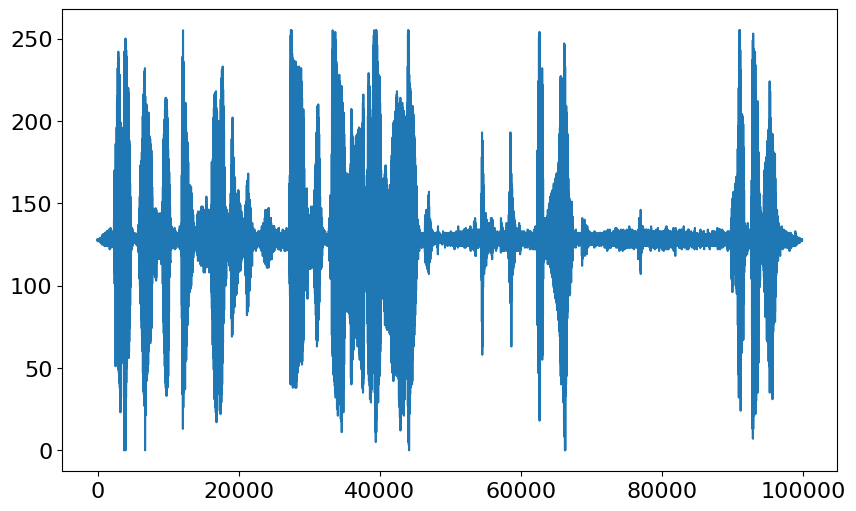

/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


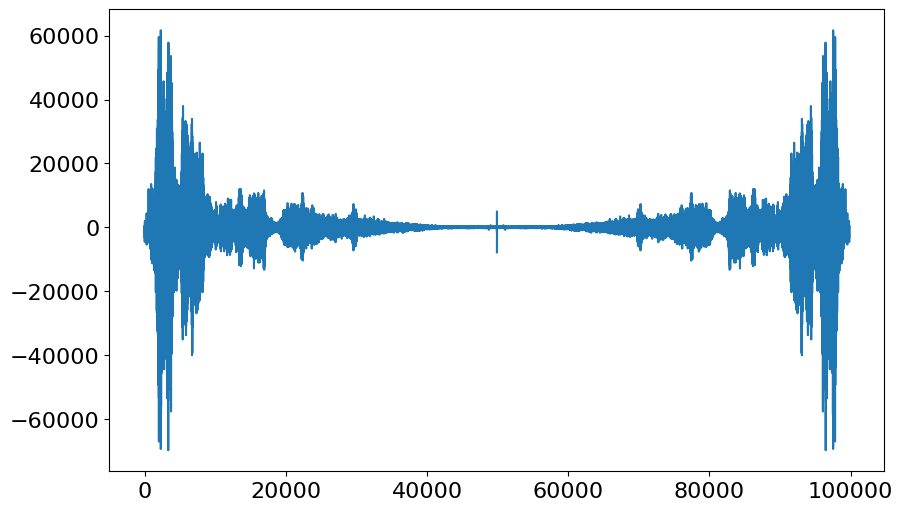

In [ ]:
# Let's plot the Fourier transform frequency spectrum!

T = t[1]-t[0]
N = t.size               

plt.plot(y_newt)
plt.show()
fnewt = np.fft.fft(y_newt)
plt.plot(fnewt[1:]) # [1:] to remove DC spike at 0
plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


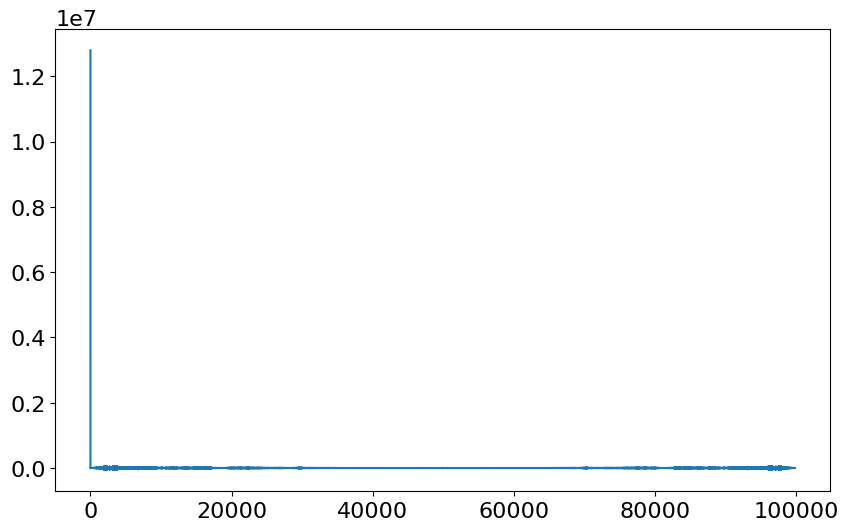

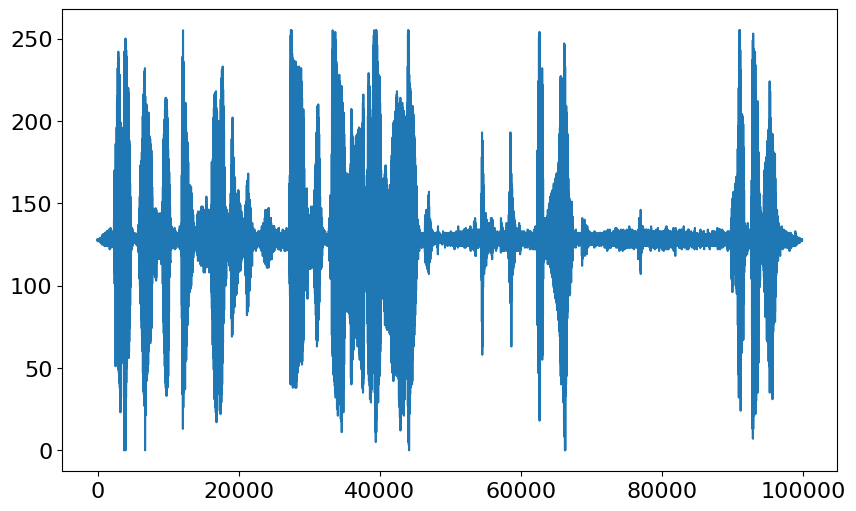

In [ ]:
fft = np.fft.fft(y_newt)
ifft = np.fft.ifft(fft)

plt.plot(fft)
plt.show()

plt.plot(ifft)
plt.show()

In [ ]:
np.corrcoef(abs(y_newt), abs(ifft))

array([[1., 1.],
       [1., 1.]])

## Let's take a listen!

Compare the original signal with the reconstructed signal by listening:

In [ ]:
# Original signal
Audio(data=y_newt, rate=sample_rate)

In [ ]:
# Digitized signal
Audio(data=abs(ifft), rate=sample_rate)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ae49e8c4-da22-4248-8601-c3c5b8597e98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>